In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('employees.csv')

In [2]:
df


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [3]:
df.head()


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
df.shape


(1000, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [24]:
df.describe


<bound method NDFrame.describe of     First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
1       Thomas    Male   3/31/1996         6:53 AM   61933    4.170   
2        Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
..         ...     ...         ...             ...     ...      ...   
995      Henry     NaN  11/23/2014         6:09 AM  132483   16.655   
996    Phillip    Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  z_Salary   z_Bonus  
0                True             Marketing  0.

In [26]:
a=df['Salary']
print(min(a))
print(max(a))
stat.mode(df['Salary'])


35013
149908


147183

In [8]:
a=df['Bonus %']
print(np.min(a))
print(np.max(a))
stat.mode(df['Bonus %'])

1.015
19.944


8.999

In [9]:
df.isnull().sum()


First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

Text(0.5, 1.0, 'Box plot of columns Salary, Bonus %')

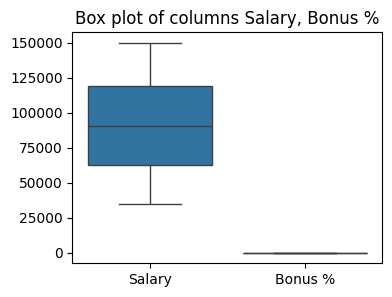

In [11]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df[['Salary', 'Bonus %']])
plt.title('Box plot of columns Salary, Bonus %') 

In [12]:
df['z_Salary']=stats.zscore(df['Salary'])
df['z_Bonus']=stats.zscore(df['Bonus %'])
print("\nzscore of column Salary")
print(df[['Salary', 'z_Salary']])
print("\nzscore of column Bonus")
print(df[['Bonus %', 'z_Bonus']])


zscore of column Salary
     Salary  z_Salary
0     97308  0.201956
1     61933 -0.873036
2    130590  1.213345
3    138705  1.459947
4    101004  0.314272
..      ...       ...
995  132483  1.270870
996   42392 -1.466857
997   96914  0.189983
998   60500 -0.916582
999  129949  1.193866

[1000 rows x 2 columns]

zscore of column Bonus
     Bonus %   z_Bonus
0      6.945 -0.590431
1      4.170 -1.092629
2     11.858  0.298684
3      9.340 -0.157003
4      1.389 -1.595912
..       ...       ...
995   16.655  1.166807
996   19.675  1.713343
997    1.421 -1.590121
998   11.985  0.321668
999   10.169 -0.006977

[1000 rows x 2 columns]


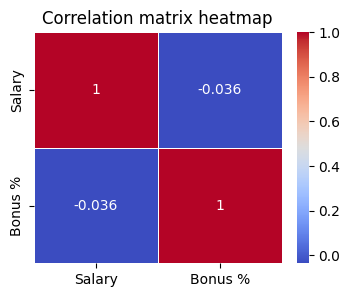

In [14]:
data=df[['Salary', 'Bonus %']] 

corr_mat=data.corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix heatmap')
plt.show()


Skewness of features:
Salary     0.047180
Bonus %    0.107464
dtype: float64

Features with Right Skew:
Series([], dtype: float64)

Features with Left Skew:
Series([], dtype: float64)

Features with No Skew:
Salary     0.047180
Bonus %    0.107464
dtype: float64


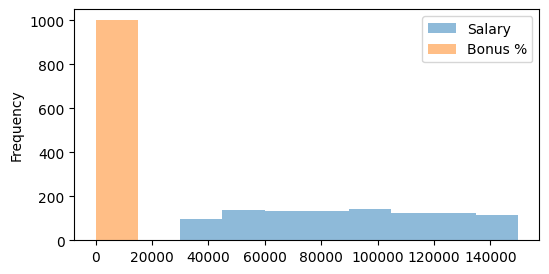

In [15]:
data=df[['Salary', 'Bonus %']]
skewness = data.skew()
print("Skewness of features:")
print(skewness)
right_skew = skewness[skewness > 0.5]
left_skew = skewness[skewness < -0.5]
no_skew = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
print("\nFeatures with Right Skew:")
print(right_skew)
print("\nFeatures with Left Skew:")
print(left_skew)
print("\nFeatures with No Skew:")
print(no_skew)
data.plot(kind='hist', bins=10, alpha=0.5, figsize=(6, 3), layout=(1, 2))
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11724\3216212606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='Team', palette='coolwarm')


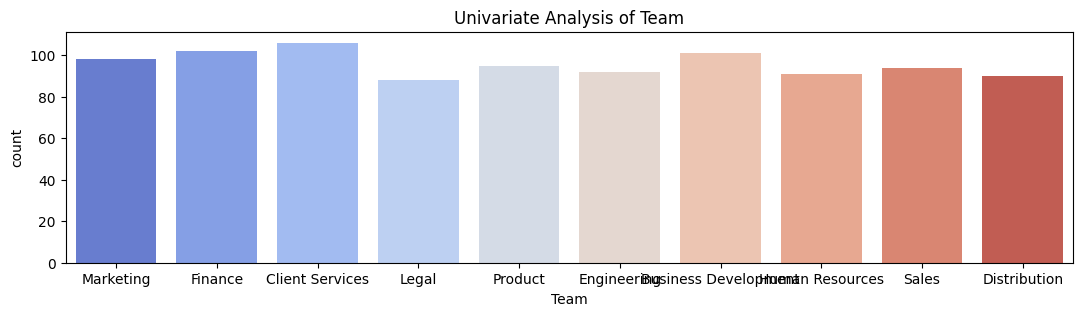

In [16]:
data=df[['First Name', 'Team']]
plt.figure(figsize=(13, 3))
sns.countplot(data, x='Team', palette='coolwarm')
plt.title('Univariate Analysis of Team')
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


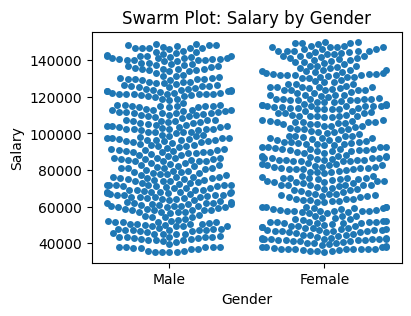

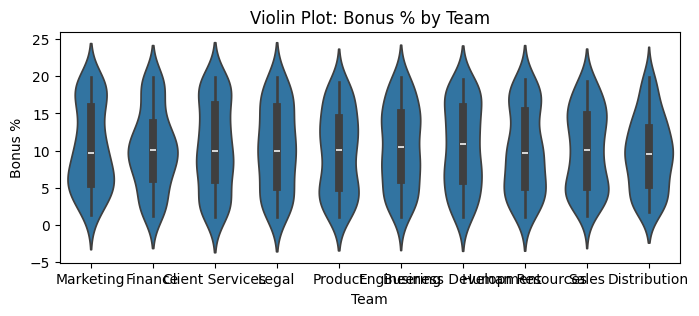

In [17]:
plt.figure(figsize=(4, 3))
sns.swarmplot(data=df, x='Gender', y='Salary')
plt.title('Swarm Plot: Salary by Gender')
plt.show()
plt.figure(figsize=(8, 3))
sns.violinplot(data=df, x='Team', y='Bonus %')
plt.title('Violin Plot: Bonus % by Team')
plt.show()


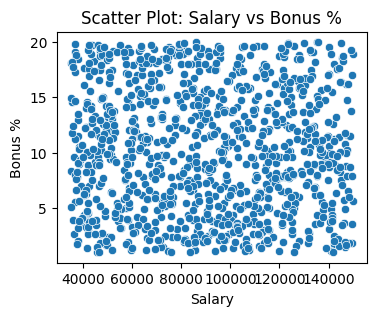

In [18]:
plt.figure(figsize=(4, 3))
sns.scatterplot(data=df, x='Salary', y='Bonus %')
plt.title('Scatter Plot: Salary vs Bonus %')
plt.xlabel('Salary')
plt.ylabel('Bonus %')
plt.show()

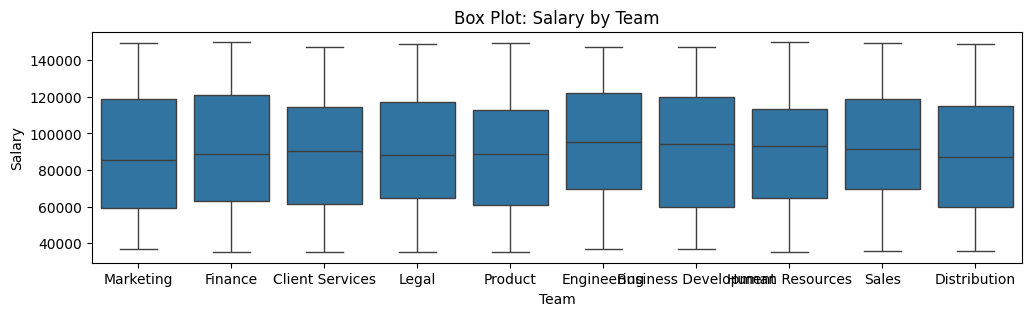

In [19]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df, x='Team', y='Salary')
plt.title('Box Plot: Salary by Team')
plt.show()

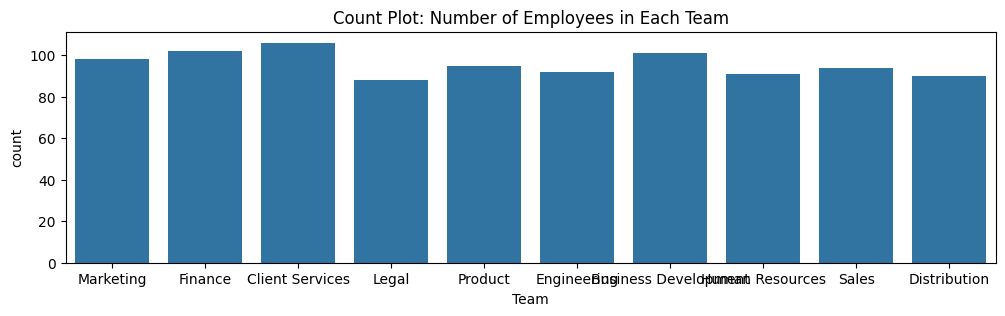

In [20]:
plt.figure(figsize=(12, 3))
sns.countplot(data=df, x='Team')
plt.title('Count Plot: Number of Employees in Each Team')
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


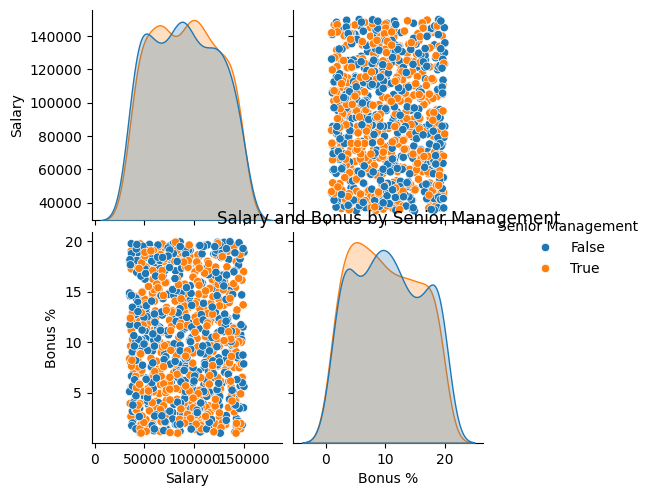

In [21]:
sns.pairplot(df, vars=['Salary', 'Bonus %'], hue='Senior Management')
plt.title('Salary and Bonus by Senior Management')
plt.show()